In [1]:
from six.moves import urllib
import requests
import nltk
from nltk import download
from bs4 import BeautifulSoup
from nltk import word_tokenize
from nltk import sent_tokenize
from nltk.corpus import words
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk import ngrams
import operator
from collections import Counter

## Part 0: 
Fetch data from url https://en.wikipedia.org/wiki/Artificial_neural_network.

In [2]:
response=urllib.request.urlopen('https://en.wikipedia.org/wiki/Artificial_neural_network')
html = response.read().decode('utf8')
#Clean up the html text from html/js/css related text.
raw = BeautifulSoup(html,'html5lib')

In [3]:
raw_text = raw.get_text()

## Part 1
-What is the word count and vocabulary of this Web page?

[nltk_data] Downloading package punkt to /home/mscuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /home/mscuser/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/mscuser/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
Number of english words are  15872
Vocabulary in the page is  [(u'the', 542), (u'of', 444), (u'and', 358), (u'a', 323), (u'to', 259), (u'in', 199), (u'neural', 160), (u'is', 155), (u'learning', 141), (u'networks', 141)]


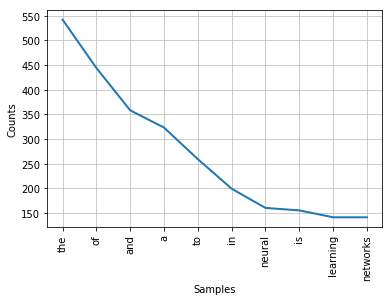

(without stopwords) Number of english words are  11233
(without stopwords) Vocabulary in the page is  [(u'neural', 160), (u'learning', 141), (u'networks', 141), (u'Neural', 123), (u'network', 108), (u'j', 88), (u'Networks', 75), (u'Learning', 67), (u'function', 66), (u'x', 65)]


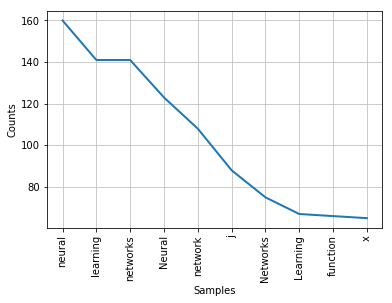

In [4]:
#Download required packages.
nltk.download('punkt')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')

words=word_tokenize(raw_text)
eng=[]
for w in words:
    if w.isalpha()==True:
        eng.append(w)
print "Number of english words are ",len(eng)
word_frequencies = nltk.FreqDist(eng)
vocabulary_sorted= sorted(word_frequencies.items(), key=operator.itemgetter(1),reverse=True)
print 'Vocabulary in the page is ',vocabulary_sorted[0:10]
word_frequencies.plot(10, cumulative=False)


#Because there are many stopwords appearing as the most common words,we are going to remove them to get a better
#view of the text.
text_no_stopwords=[]
for w in eng:
    if w.lower() not in stopwords.words('english'):
        text_no_stopwords.append(w)
print "(without stopwords) Number of english words are ",len(text_no_stopwords)
word_frequencies2 = nltk.FreqDist(text_no_stopwords)
vocabulary_sorted2= sorted(word_frequencies2.items(), key=operator.itemgetter(1),reverse=True)
print '(without stopwords) Vocabulary in the page is ',vocabulary_sorted2[0:10]
word_frequencies2.plot(10, cumulative=False)

## Part 2
-How many sentences are contained in the page?

In [5]:
sent_tokenize_list = sent_tokenize(raw_text)
print 'There exist ',len(sent_tokenize_list),' sentences.'

There exist  1657  sentences.


## Part 3
-What is the lexical diversity of the page?

In [6]:
diversity=len(set(eng))/float(len(eng))
print 'Lexical diversity with stopwords is ',diversity
diversity=len(set(text_no_stopwords))/float(len(text_no_stopwords))
print 'Lexical diversity without stopwords is ',diversity

Lexical diversity with stopwords is  0.253591229839
Lexical diversity without stopwords is  0.343630374789


## Part 4
-What are the 5 most common lexical categories (parts of speech)?

In [7]:
pos_list=nltk.pos_tag(eng)
frequencies = FreqDist([tag for (word, tag) in pos_list])
print "5 most common lexical categories are with stopwords are",frequencies.most_common(5)

5 most common lexical categories are with stopwords are [('NNP', 4215), ('NN', 2939), ('IN', 1590), ('JJ', 1397), ('DT', 1217)]


## Part 5
-What are the 10 most common unigrams, the 10 most common bigrams? (please exclude stopwords, using the nltk.corpus.stopwords('english') list)

In [8]:
#Already removed the stopwords in previous questions.
unigrams = ngrams(text_no_stopwords,1)
bigrams = ngrams(text_no_stopwords,2)

print 'The top 10 most common unigrams are : ',Counter(unigrams).most_common(10)
print 'The top 10 most common bigrams are : ',Counter(bigrams).most_common(10)

        

The top 10 most common unigrams are :  [((u'neural',), 160), ((u'learning',), 141), ((u'networks',), 141), ((u'Neural',), 123), ((u'network',), 108), ((u'j',), 88), ((u'Networks',), 75), ((u'Learning',), 67), ((u'function',), 66), ((u'edit',), 65)]
The top 10 most common bigrams are :  [((u'neural', u'networks'), 77), ((u'neural', u'network'), 56), ((u'Neural', u'Networks'), 55), ((u'j', u'j'), 36), ((u'Artificial', u'Neural'), 20), ((u'x', u'x'), 18), ((u'ready', u'ready'), 18), ((u'cost', u'function'), 17), ((u'h', u'h'), 17), ((u'artificial', u'neural'), 15)]


## Part 6
-How many nouns are in the page?

In [9]:
print 'Number of nouns in page are : ',Counter(tag for word,tag in pos_list)['NN']

Number of nouns in page are :  2939
